# Script to find all pdb files and list the peptide and receptor length

This script below loads all information and stores them in a .txt file

In [256]:
def WriteToFile(Name, Protein, Peptide):
    fh = open('lengths.txt', 'a') 
    if (float(Protein) == float(Peptide)):
        Peptide = 0

    fh.write(str(Name) + ' ' + str(Protein) +  ' ' + str(Peptide) + '\n')  
    fh.close() 

In [257]:
import glob
import os

files = glob.glob('*.pdb')
counter = 0
files_length = len(files)
while (counter < files_length - 1):
    
    f = open(files[counter], 'r')
    targets = [line.split() for line in f.readlines()[:]]
    f.close()

    data = []
    for target in targets:
        if (target[0]!='TER' and target[0]!='END'):
            data.append(target[5])

    Prot_Length = max([float(i) for i in data])
    Pep_Length = data[len(data)-1]
    WriteToFile(files[counter],int(Prot_Length),Pep_Length)
    counter = counter + 1

This script loads the .txt file and sorts them

In [1]:
import numpy as np

dtype = [('name', 'S20'), ('Protein', int), ('Peptide', int)]
data = np.genfromtxt("lengths.txt",dtype=dtype)
data = np.sort(data,order=['Protein','Peptide'])

This script displays the sorted data in a table. Note, if the peptide length is 0 it means that something went wrong with that row, probably because the peptide was first in the pdb file

In [2]:
from IPython.display import HTML, display
display(HTML('<table><tr>{}</tr></table>'.format('</tr><tr>'.join('<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data))))


3fp7IJ_.pdb,43,0
1pdqBA_.pdb,51,8
1gbqBA_.pdb,57,10
2w84BA_.pdb,57,20
2jmjPA_.pdb,60,8
3q6sEB_.pdb,67,14
2lcsBA_.pdb,67,16
3aslBA_.pdb,68,9
1dpuBA_.pdb,69,16
1pmxBA_.pdb,70,16
1j2xBA_.pdb,70,18


The proteins length range from 43 to 999 AA.

In [3]:
import numpy as np

dtype = [('name', 'S20'), ('Protein', int), ('Peptide', int)]
data = np.genfromtxt("lengths.txt",dtype=dtype)
data = np.sort(data,order=['Peptide','Protein'])

In [4]:
from IPython.display import HTML, display
display(HTML('<table><tr>{}</tr></table>'.format('</tr><tr>'.join('<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data))))


3fp7IJ_.pdb,43,0
2k17PA_.pdb,75,0
1q0wAB_.pdb,76,0
1mv0AB_.pdb,81,0
3w6kAC_.pdb,87,0
2mnjAB_.pdb,88,0
1g1eAB_.pdb,89,0
2c5kPT_.pdb,89,0
2kbmXA_.pdb,93,0
2mwnAB_.pdb,93,0
1uheBA_.pdb,97,0



If we discard the Peptide lengths this script didnt pick up(most likely due to the peptide chain being first) 
we see that the peptide lengths range from 4 to 24 AA.

Since we want to test the effect of both peptide and protein length, we must pick examples that when the amount of peptides differ, the proteins does not change and vice versa

## Examples suitable for Protein time test

Name    Protein Peptide Time(Avg from 10 tests)
1pdqBA_.pdb	51	8       19
2jmjPA_.pdb	60	8	    39
1l6oFC_.pdb	87	8    	44
2axiBA_.pdb	92	8	    50
1jd6BA_.pdb	102	8       58
1jplEA_.pdb	156	8	    119
5dmsDC_.pdb	222	8    	300
1pfgBA_.pdb	279	8       432
2y1nBA_.pdb	377	8       882
3c2gCA_.pdb	603	8       2927

## Examples suitable for Peptide time test 

Name    Protein Peptide Time(Avg from 10 tests)
1abtBA_.pdb	74 	6       50
2mc6BA_.pdb	73	10      52
2v1tCA_.pdb	72	12	    26
4a5xCA_.pdb	73	14      29
1ilpCA_.pdb	71	16 	    50
3pluCA_.pdb	74	18      34
1ozsBA_.pdb	73	20	    51
3tz1BA_.pdb	71	24      44

## Plotting protein time test

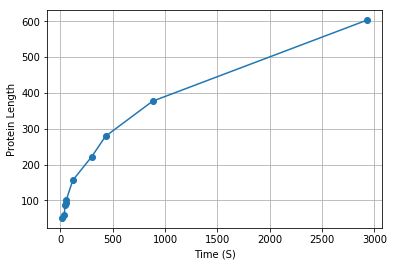

In [122]:
import matplotlib.pyplot as plt
import numpy as np
Protein_Length = np.loadtxt("Data/Protein time test.txt", usecols=(1))
Time = np.loadtxt("Data/Protein time test.txt", usecols=(3))

plt.plot(Time,Protein_Length,marker='o')
plt.ylabel('Protein Length')
plt.xlabel('Time (S)')
plt.grid(True)
plt.show()


## Plotting peptide time test

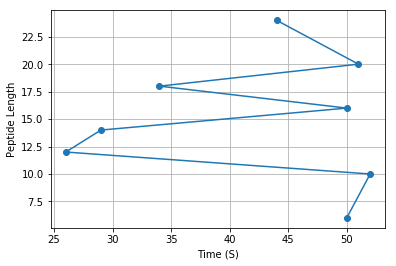

In [123]:
import matplotlib.pyplot as plt
import numpy as np

Peptide_Length = np.loadtxt("Data/Peptide time test.txt", usecols=(2))
Time = np.loadtxt("Data/Peptide time test.txt", usecols=(3))

plt.plot(Time,Peptide_Length,marker='o')
plt.ylabel('Peptide Length')
plt.xlabel('Time (S)')
plt.grid(True)
plt.show()


## Histogram over Peptide and Protein Length

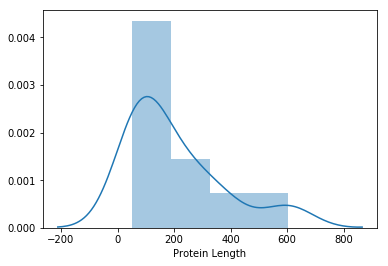

In [96]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

Protein_Length = np.loadtxt("Data/Protein time test.txt", usecols=(1))
Protein_Length = pd.Series(Protein_Length, name="Protein Length")

sns.distplot(Protein_Length,bins = 4)

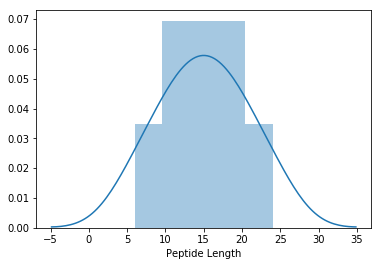

In [120]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

Peptide_Length = np.loadtxt("Data/Peptide time test.txt", usecols=(2))
Peptide_Length = pd.Series(Peptide_Length, name="Peptide Length")

sns.distplot(Peptide_Length,bins=5)